In [19]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%autoreload 2

In [21]:
!python -V

Python 3.8.6


In [22]:
!pwd

/home/deepstation/Projects/rock-paper-scissor


In [23]:
import matplotlib.pyplot as plt

from morty.config import ConfigManager
from morty.experiment import set_random_seed
from rock_paper_scissors.datasets import get_dataset, get_test_dataset

# Dataset Augmentation

This notebook shows augmented images and helps to select useful aumentation technics in order to avoid overfitting and get a robust model.

In [24]:
config = ConfigManager(config_path='configs', config_name='basic_config', console_args={})

print(config)

ConfigManager({
  "seed": 63815329,
  "train_dataset_path": "data/rps/rps/",
  "test_dataset_path": "data/rps-test-set/rps-test-set/",
  "image_size": [
    300,
    300
  ],
  "num_classes": 3,
  "epochs": 20,
  "batch_size": 32,
  "learning_rate": 0.001,
  "feature_extractor": "MobileNetV2",
  "train_augmentation": "Compose([\n  VerticalFlip(always_apply=False, p=0.5),\n  HorizontalFlip(always_apply=False, p=0.5),\n  RandomBrightness(always_apply=False, p=0.5, limit=(-0.1, 0.1)),\n  HueSaturationValue(always_apply=False, p=0.5, hue_shift_limit=(-20, 20), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20)),\n], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})",
  "validation_augmentation": "Compose([\n  VerticalFlip(always_apply=False, p=0.5),\n  HorizontalFlip(always_apply=False, p=0.5),\n], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})",
  "test_augmentation": "Compose([\n], p=1.0, bbox_params=None, keypoint_params=None, additional_targ

In [25]:
set_random_seed(config.seed)

train_dataset = get_dataset(
    config.train_dataset_path,
    'training',
    config.train_augmentation,
    validation_fraction=0.2,
    batch_size=config.batch_size,
    image_size=config.image_size,
    seed=config.seed,
)

Found 2520 files belonging to 3 classes.
Using 2016 files for training.


In [26]:
plt.figure(figsize=(10, 10))

for image_batch, _ in train_dataset.take(1):
    for idx in range(9):
        image = image_batch[idx].numpy().astype('uint8')

        ax = plt.subplot(3, 3, idx + 1)
        plt.imshow(image)
        plt.axis('off')

UnknownError: error: OpenCV(4.5.2) /tmp/pip-req-build-dzetuct2/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3>; VDepth = cv::impl::{anonymous}::Set<0, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1

Traceback (most recent call last):

  File "/home/deepstation/Projects/rock-paper-scissor/.venv/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 249, in __call__
    ret = func(*args)

  File "/home/deepstation/Projects/rock-paper-scissor/.venv/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 645, in wrapper
    return func(*args, **kwargs)

  File "/tmp/tmp7zd029mu.py", line 16, in apply_augmentation
    aug_data = ag__.converted_call(ag__.ld(augmentation_pipeline), (), dict(image=ag__.ld(images)), fscope_1)

  File "/home/deepstation/Projects/rock-paper-scissor/.venv/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 340, in converted_call
    return _call_unconverted(f, args, kwargs, options, False)

  File "/home/deepstation/Projects/rock-paper-scissor/.venv/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 463, in _call_unconverted
    return f(*args, **kwargs)

  File "/home/deepstation/Projects/rock-paper-scissor/.venv/lib/python3.8/site-packages/albumentations/core/composition.py", line 182, in __call__
    data = t(force_apply=force_apply, **data)

  File "/home/deepstation/Projects/rock-paper-scissor/.venv/lib/python3.8/site-packages/albumentations/core/transforms_interface.py", line 89, in __call__
    return self.apply_with_params(params, **kwargs)

  File "/home/deepstation/Projects/rock-paper-scissor/.venv/lib/python3.8/site-packages/albumentations/core/transforms_interface.py", line 102, in apply_with_params
    res[key] = target_function(arg, **dict(params, **target_dependencies))

  File "/home/deepstation/Projects/rock-paper-scissor/.venv/lib/python3.8/site-packages/albumentations/augmentations/transforms.py", line 2234, in apply
    return F.shift_hsv(image, hue_shift, sat_shift, val_shift)

  File "/home/deepstation/Projects/rock-paper-scissor/.venv/lib/python3.8/site-packages/albumentations/augmentations/functional.py", line 54, in wrapped_function
    result = func(img, *args, **kwargs)

  File "/home/deepstation/Projects/rock-paper-scissor/.venv/lib/python3.8/site-packages/albumentations/augmentations/functional.py", line 419, in shift_hsv
    img = _shift_hsv_non_uint8(img, hue_shift, sat_shift, val_shift)

  File "/home/deepstation/Projects/rock-paper-scissor/.venv/lib/python3.8/site-packages/albumentations/augmentations/functional.py", line 382, in _shift_hsv_non_uint8
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

cv2.error: OpenCV(4.5.2) /tmp/pip-req-build-dzetuct2/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3>; VDepth = cv::impl::{anonymous}::Set<0, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1



	 [[{{node PyFunc}}]] [Op:IteratorGetNext]

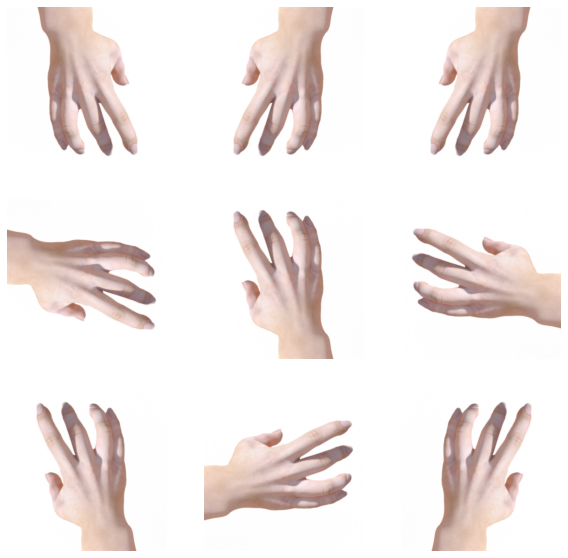

In [18]:
plt.figure(figsize=(10, 10))

for image_batch, _ in train_dataset.take(1):
    image = image_batch[0].numpy().astype('uint8')

    for idx in range(9):
        augmented_image = config.train_augmentation(image=image)['image']

        ax = plt.subplot(3, 3, idx + 1)
        plt.imshow(augmented_image)
        plt.axis('off')